# Pruebas  de clasificacion con los modelos Resnet50 y Resnet101

In [263]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [264]:
# Función para cargar y preprocesar la imagen
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')  # Asegúrate de que la imagen esté en RGB
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = transform(image).unsqueeze(0)  # Añadir una dimensión para el batch
    return image

# Función para mostrar la imagen
def show_image(image, label):
    # Convertir tensor a imagen
    image = image.squeeze(0)  # Eliminar la dimensión del batch
    image = image.permute(1, 2, 0)  # Cambiar la forma a (H, W, C)
    image = image.numpy()  # Convertir a numpy
    image = np.clip(image * 255, 0, 255).astype(np.uint8)  # Desnormalizar y convertir a uint8
    
    plt.imshow(image)
    plt.title(f'Predicción: {label}')
    plt.axis('off')  # Ocultar ejes
    plt.show()

# Función para realizar la predicción
def predict(model, image_path, class_names):
    model.eval()  # Modo evaluación
    image = load_image(image_path)  # Cargar y preprocesar la imagen

    with torch.no_grad():  # No calcular gradientes
        outputs = model(image)  # Hacer la predicción
        _, preds = torch.max(outputs, 1)  # Obtener las clases predichas
        predicted_class = class_names[preds.item()]  # Obtener el nombre de la clase

    return predicted_class, image  # Devolver la etiqueta predicha y la imagen



In [265]:
# Cargar el modelo completo y los parámetros en CPU
model_complete = torch.load('modelo_entrenado_TL_R50.pth', map_location=torch.device('cpu'))
class_names = ['Daños por nematodos', 'Daños por plagas', 'Enfermedades bacterianas',
               'Enfermedades fúngicas', 'Enfermedades virales', 'Salud',
               'Tizón tardío (Phytophthora)', 'Tizón temprano']


C:\Users\alex_DILE\AppData\Local\Temp\ipykernel_22928\779200549.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_complete = torch.load('modelo_entrenado_TL_R50.pth'

In [276]:
# Predecir usando el modelo completo
image_path = 'papas_cusco_redimensionadas/imagen_162.jpg'  # Cambia esto por la ruta a tu imagen
predicted_class_complete, image_complete = predict(model_complete, image_path, class_names)


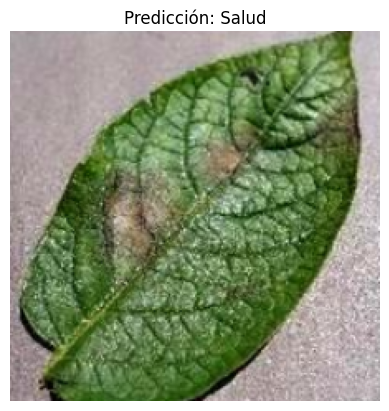

In [279]:
# Mostrar la imagen y la etiqueta predicha
show_image(image_complete, predicted_class_complete)

In [268]:
# Cargar solo los parámetros del modelo
model_params = models.resnet50(weights=None) 

num_ftrs = model_params.fc.in_features
model_params.fc = torch.nn.Linear(num_ftrs, len(class_names))

try:
    model_params.load_state_dict(torch.load('modelo_entrenado_TL_R50_parameters.pth', map_location=torch.device('cpu')))
except RuntimeError as e:
    print(f"Error cargando los parámetros: {e}")

model_params.eval()  # Modo evaluación


Error cargando los parámetros: Error(s) in loading state_dict for ResNet:
	Missing key(s) in state_dict: "fc.weight", "fc.bias". 
	Unexpected key(s) in state_dict: "fc.0.weight", "fc.0.bias", "fc.3.weight", "fc.3.bias". 


C:\Users\alex_DILE\AppData\Local\Temp\ipykernel_22928\3837917454.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_params.load_state_dict(torch.load('modelo_entrena

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

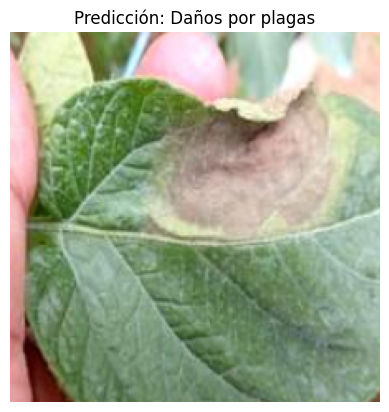

In [269]:
# Predecir usando solo los parámetros
image_path = 'papas_cusco_redimensionadas/imagen_12.jpg'  
predicted_class_params, image_params = predict(model_params, image_path, class_names)

show_image(image_params, predicted_class_params)

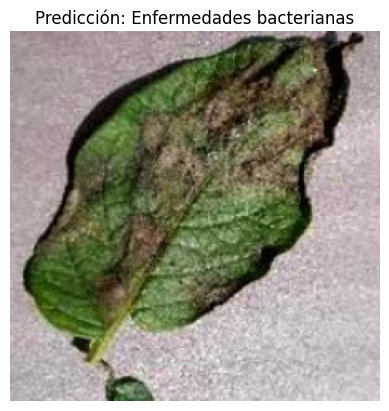

In [270]:
# Predecir usando solo los parámetros
image_path = 'papas_cusco_redimensionadas/imagen_136.jpg'  # Cambia esto por la ruta a tu imagen
predicted_class_params, image_params = predict(model_params, image_path, class_names)

# Mostrar la imagen y la etiqueta predicha
show_image(image_params, predicted_class_params)